# PCA

In [15]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [17]:
X = df.drop('Time',axis = 1)
y = df.iloc[:,-2]
X = X.fillna(value = 0)
X = X.iloc[:,:-2]
y.head()

0    149.62
1      2.69
2    378.66
3    123.50
4     69.99
Name: Amount, dtype: float64

In [18]:
pca = PCA(n_components=2)
red = pca.fit_transform(X)

In [19]:
print(red)

[[ 1.3454283  -0.14838896]
 [-1.20113433 -0.23203071]
 [ 1.39280328  1.11686801]
 ...
 [-2.1115663   0.86170324]
 [-1.9808116   0.36757232]
 [-2.37634384  0.11611366]]


In [20]:
principal_df = pd.DataFrame(data=red, columns=['PC1', 'PC2'])
final_df = pd.concat([principal_df, df[['Class']]], axis=1)
final_df


,PC1,PC2,Class
0,1.345428,-0.148389,0.0
1,-1.201134,-0.232031,0.0
2,1.392803,1.116868,0.0
3,0.932437,0.038455,0.0
4,1.094819,-1.021307,0.0
...,...,...,...
269307,-0.544298,-0.693063,0.0
269308,-1.948740,0.497644,0.0
269309,-2.111566,0.861703,0.0
269310,-1.980812,0.367572,0.0


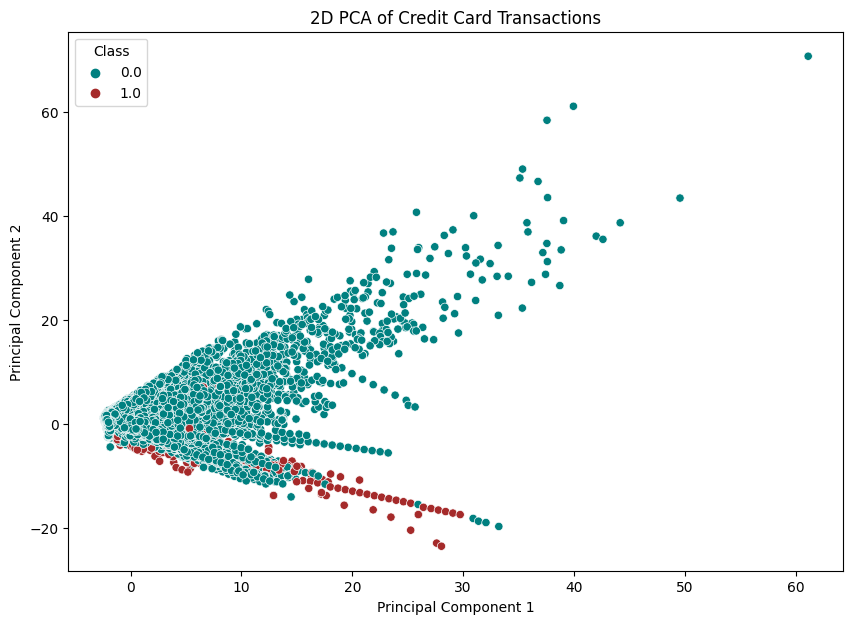

In [22]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x="PC1", y="PC2", hue="Class", data=final_df, palette=['teal', 'brown'])
plt.title('2D PCA of Credit Card Transactions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()